In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Composition (%)')

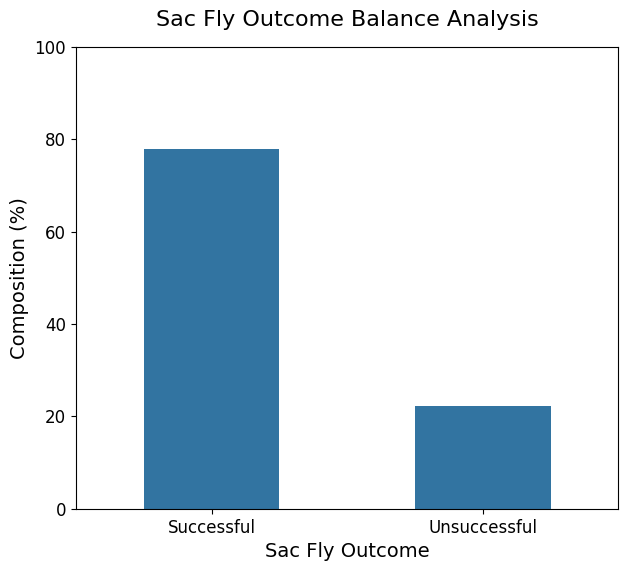

In [2]:
# Load your data
on_base = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")

on_base = on_base.with_columns(
    pl.when(pl.col("event_type").is_in(["sac_fly", "sac_fly_double_play"]))
    .then(pl.lit("Successful"))
    .otherwise(pl.lit("Unsuccessful"))
    .alias("is_successful")
)

# Select relevant columns and drop nulls
on_base = on_base.select([
    "distance_traveled_fielder",
    "distance_traveled_all_fielders",
    "distance_catch_to_home",
    "distance_to_home_diff",
    "seconds_since_hit_085_mlb_person_id_R3",
    "max_arm_strength_fielder_mlb_person_id",
    "is_successful"
]).drop_nulls().collect()

plt.figure(figsize=(7, 6))
sns.countplot(x="is_successful", stat = "percent", data=on_base, width = .5)
plt.title("Sac Fly Outcome Balance Analysis", fontsize=16, pad=15)
plt.ylim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Sac Fly Outcome", fontsize=14)
plt.ylabel("Composition (%)", fontsize=14)